<a href="https://colab.research.google.com/github/Renni-W/Crude-Oil-Deep-Learning-Predictions/blob/main/LSTM_for_crude_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv('merged_data1.csv')
dataset = dataframe.values
# Converting te dataset to float32 for compatibility with Keras
dataset = dataset[:,1].astype('float32')
dataset = dataset.reshape(-1,1)
dataset

array([[18.475],
       [18.535],
       [18.505],
       ...,
       [93.6  ],
       [93.385],
       [95.105]], dtype=float32)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.06917611]
 [0.06962025]
 [0.06939818]
 ...
 [0.6252869 ]
 [0.6236954 ]
 [0.63642764]]


In [ ]:
train_size = int(len(scaled_data) * 0.70)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data)+1, :]

In [ ]:
def create_dataset(dataset, look_back=8):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Use the function to prepare the train and test datasets for modeling
look_back = 16
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshaping the input data
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(trainX, trainY, epochs=50, batch_size=2,validation_data=(testX, testY), verbose=2)

Epoch 1/50
2802/2802 - 13s - loss: 0.0016 - val_loss: 4.0113e-04 - 13s/epoch - 4ms/step
Epoch 2/50
2802/2802 - 9s - loss: 2.6008e-04 - val_loss: 2.7529e-04 - 9s/epoch - 3ms/step
Epoch 3/50
2802/2802 - 9s - loss: 2.3336e-04 - val_loss: 2.5025e-04 - 9s/epoch - 3ms/step
Epoch 4/50
2802/2802 - 10s - loss: 2.0073e-04 - val_loss: 2.4477e-04 - 10s/epoch - 3ms/step
Epoch 5/50
2802/2802 - 10s - loss: 1.9422e-04 - val_loss: 2.5619e-04 - 10s/epoch - 4ms/step
Epoch 6/50
2802/2802 - 8s - loss: 1.8733e-04 - val_loss: 3.3159e-04 - 8s/epoch - 3ms/step
Epoch 7/50
2802/2802 - 9s - loss: 1.6070e-04 - val_loss: 3.5809e-04 - 9s/epoch - 3ms/step
Epoch 8/50
2802/2802 - 8s - loss: 1.5308e-04 - val_loss: 2.7336e-04 - 8s/epoch - 3ms/step
Epoch 9/50
2802/2802 - 8s - loss: 1.5270e-04 - val_loss: 1.8900e-04 - 8s/epoch - 3ms/step
Epoch 10/50
2802/2802 - 11s - loss: 1.4468e-04 - val_loss: 1.8562e-04 - 11s/epoch - 4ms/step
Epoch 11/50
2802/2802 - 9s - loss: 1.4740e-04 - val_loss: 1.8608e-04 - 9s/epoch - 3ms/step
Epoc

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions due to previous scaling done earlier
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

75/75 [==============================] - 0s 2ms/step


In [ ]:
aa = pd.DataFrame(list(zip(testPredict, testY.transpose().round(4))), columns = ["Predict","Y"])
aa.to_csv()
aa
# testY.transpose()


,Predict,Y
0,[108.063576],[106.05]
1,[107.35523],[105.715]
2,[106.99575],[107.285]
3,[108.01904],[106.655]
4,[107.83835],[107.02]
...,...,...
2387,[92.84531],[91.9]
2388,[93.11861],[92.395]
2389,[93.589355],[92.02]
2390,[93.42659],[93.6]


In [ ]:
dataframe[train_size+1:,]

,Date,CRD_CLOSE,CRD_HIGH,CRD_LOW,FX_Price,FX_Open,G_USD
5637,3/21/2014,105.715,105.72,105.71,2.6325,2.570,1336.00
5638,3/24/2014,107.285,107.29,107.28,2.6442,2.630,1310.75
5639,3/25/2014,106.655,106.66,106.65,2.6725,2.640,1313.50
5640,3/26/2014,107.020,107.03,107.01,2.6562,2.670,1304.00
5641,3/27/2014,106.005,106.01,106.00,2.6724,2.640,1296.00
...,...,...,...,...,...,...,...
8024,9/11/2023,92.395,92.40,92.39,11.3500,11.485,1924.95
8025,9/12/2023,92.020,92.03,92.01,11.3500,11.425,1908.55
8026,9/13/2023,93.600,93.61,93.59,11.4200,11.425,1913.80
8027,9/14/2023,93.385,93.39,93.38,11.4300,11.475,1901.75


In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(f'Train Score: {trainScore:.4f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Test Score: {testScore:.4f} RMSE')

Train Score: 1.6113 RMSE
Test Score: 2.0733 RMSE


In [ ]:
mse = mean_squared_error(testY[0], testPredict[:, 0])
mae = mean_absolute_error(testY[0], testPredict[:, 0])
r2 = r2_score(testY[0], testPredict[:, 0])
print([mse,mae, r2])

[4.298542964116717, 1.6047492032204704, 0.9907102799501825]


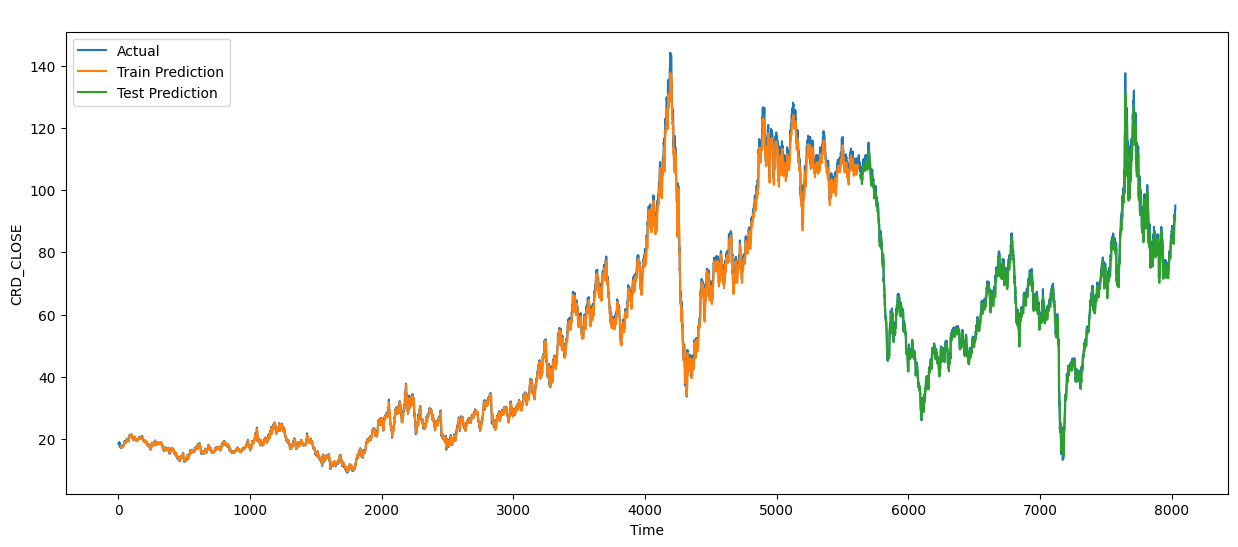

In [ ]:
2# Shift  c train predictions for plotting
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.title(' ')
plt.xlabel('Time')
plt.ylabel('CRD_CLOSE')
plt.legend()
plt.show()

In [ ]:
# Save the model
model.save('lstm_model.h5')

# Load the model (if needed later)
from tensorflow.keras.models import load_model
lstmModel = load_model('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(history.history)

{'loss': [0.0007282522856257856, 0.00024326790298800915, 0.00016774432151578367, 0.0001602095871930942, 0.00014939326501917094, 0.00014738069148734212, 0.0001335286651737988, 0.0001290893997065723, 0.00012462477025110275, 0.00013085980026517063, 0.00012123124906793237, 0.00012020843132631853, 0.00011513132631080225, 0.00012558586604427546, 0.00011082494893344119, 0.00010917941108345985, 0.0001123576148529537, 0.00010596952779451385, 0.00010642602865118533, 0.0001043250085785985, 0.00010258770635118708, 0.00010650271724443883, 0.0001067336997948587, 0.00010277671390213072, 0.00010190874309046194, 0.0001042272342601791, 9.958545706467703e-05, 9.563298226566985e-05, 0.00010035245213657618, 9.850940841715783e-05, 0.00010061603097710758, 0.00010483022924745455, 9.621656499803066e-05, 9.541460894979537e-05, 9.51713154790923e-05, 9.599155600881204e-05, 9.73669666564092e-05, 9.30939640966244e-05, 9.446640615351498e-05, 9.53873895923607e-05, 9.695206972537562e-05, 9.713023609947413e-05, 9.50263

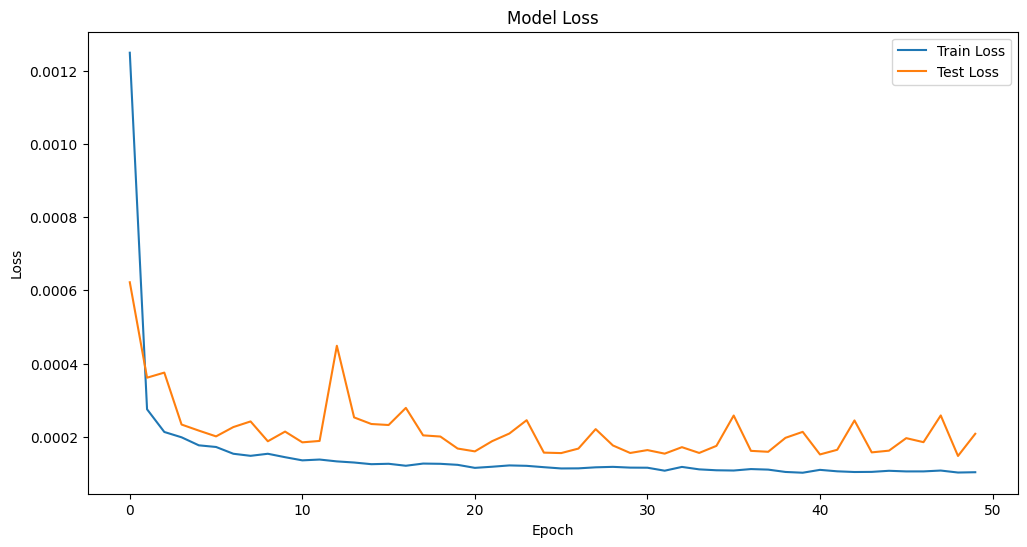

In [ ]:
# Plot training & validation loss values to investigate overfitting or underfitting
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()